In [1]:
import skxray.core.xsvs as xsvs
import skxray.core.xsvs_fitting as xsvs_fit
import skxray.core.roi as roi
import skxray.core.correlation as corr
import skxray.core.utils as core

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [17]:
images1 = []
for i in range(10):
    int_array = np.tril((i+1)*np.ones(10))
    if i==10/2:
        int_array[int_array == 0] = 20
    else:
        int_array[int_array == 0] = (i+1)*2
    images1.append(int_array)       
images1

[array([[ 1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]),
 array([[ 2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,

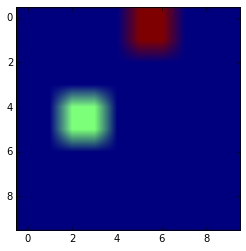

In [18]:
roi_data = np.array(([4, 2, 2, 2], [0, 5, 2, 2]), dtype=np.int64)
label_array = roi.rectangles(roi_data, shape=images1[0].shape)
plt.imshow(label_array)

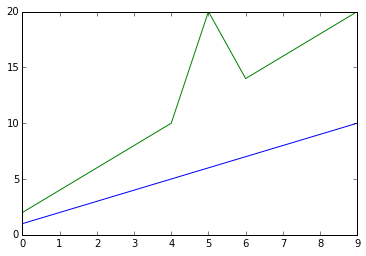

In [19]:
image_sets=[np.asarray(images1), ]

num_times = 2
num_rois = 2

mean_int_sets, index_list = roi.mean_intensity_sets(image_sets, label_array)

combine_intensity = roi.combine_mean_intensity(mean_int_sets, index_list)

plt.plot(combine_intensity)
plt.show()

In [22]:
max_cts = roi.roi_max_counts(image_sets, label_array)
max_cts

20.0

In [23]:
mean_int_ring = np.mean(combine_intensity, axis=0)
mean_int_ring

array([  5.5,  11.8])

In [24]:
num_times=4
norm_bin_edges, norm_bin_centers = xsvs.normalize_bin_edges(num_times,
                                                            num_rois, mean_int_ring, max_cts)

In [27]:
spe_cts_all, std_dev = xsvs.xsvs(image_sets, label_array, timebin_num=2,
                             number_of_img=10, max_cts=max_cts)

In [30]:
spe_cts_all

array([[ array([ 0. ,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]),
        array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])],
       [ array([ 0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,
        0.2,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ]),
        array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.2])],
       [ array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0